In [1]:
DATA_DIR = "datasets/raw_orig"
DATA_FILE = f"{DATA_DIR}/all_datasets.csv"

MODEL_DIR = "models"
FASTTEXT_MODEL_DIR = f"{MODEL_DIR}/fasttext"

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data
df = pd.read_csv(DATA_FILE)

# Display the first few rows of the dataframe
df.head()

,issuekey,title,description,storypoint
0,GHS-1271,As a JIRA Administrator I would like to be abl...,NaN,5
1,JSW-1271,As a JIRA Administrator I would like to be abl...,NaN,5
2,GHS-1681,Generic webwork aliases may clash with other p...,Some web work actions have commands that have ...,5
3,JSW-1681,Generic webwork aliases may clash with other p...,Some web work actions have commands that have ...,5
4,GHS-1819,"Add text to the Agile Gadget ""Invalid Project""...","When the error is ""Invalid Project"" add detail...",2


In [3]:
# Perform descriptive statistics
df.describe(include='all')

,issuekey,title,description,storypoint
count,23327,23327,21092,23327.000000
unique,23313,23089,20805,NaN
top,DM-22,Export babili translations into trunk of SVN,See https://confluence.lsstcorp.org/display/DM...,NaN
freq,3,21,13,NaN
mean,NaN,NaN,NaN,6.215116
std,NaN,NaN,NaN,10.005808
min,NaN,NaN,NaN,1.000000
25%,NaN,NaN,NaN,2.000000
50%,NaN,NaN,NaN,4.000000
75%,NaN,NaN,NaN,8.000000


In [4]:
# Drop the null values and 'issuekey' column
df = df.dropna()
df = df.drop(['issuekey'], axis=1)

# Display the first few rows of the dataframe
df.head()

,title,description,storypoint
2,Generic webwork aliases may clash with other p...,Some web work actions have commands that have ...,5
3,Generic webwork aliases may clash with other p...,Some web work actions have commands that have ...,5
4,"Add text to the Agile Gadget ""Invalid Project""...","When the error is ""Invalid Project"" add detail...",2
5,"Add text to the Agile Gadget ""Invalid Project""...","When the error is ""Invalid Project"" add detail...",2
6,Greenhopper ranking field is not displayed cor...,When using Greenhopper ranking field in conjun...,20


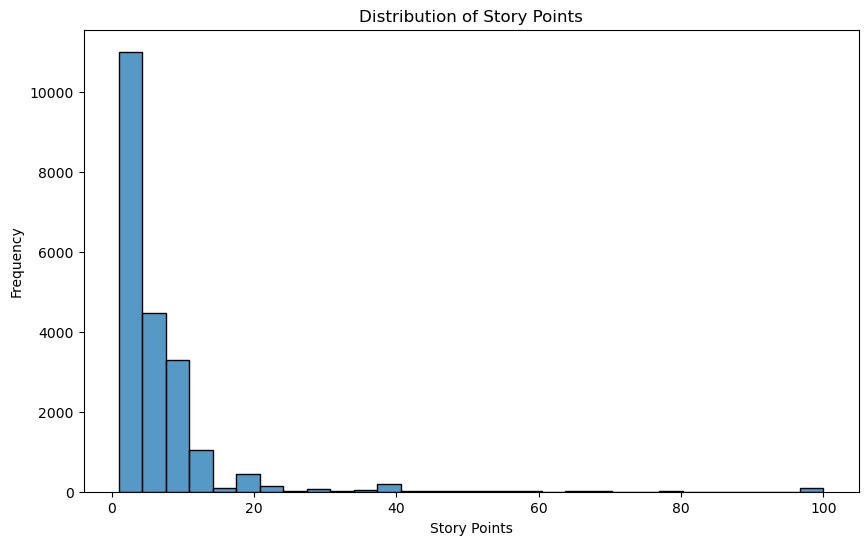

In [5]:
# Create a data visualization for the dataset
# Here we will plot the distribution of 'storypoint'
plt.figure(figsize=(10,6))
sns.histplot(df['storypoint'], kde=False, bins=30)
plt.title('Distribution of Story Points')
plt.xlabel('Story Points')
plt.ylabel('Frequency')
plt.show()

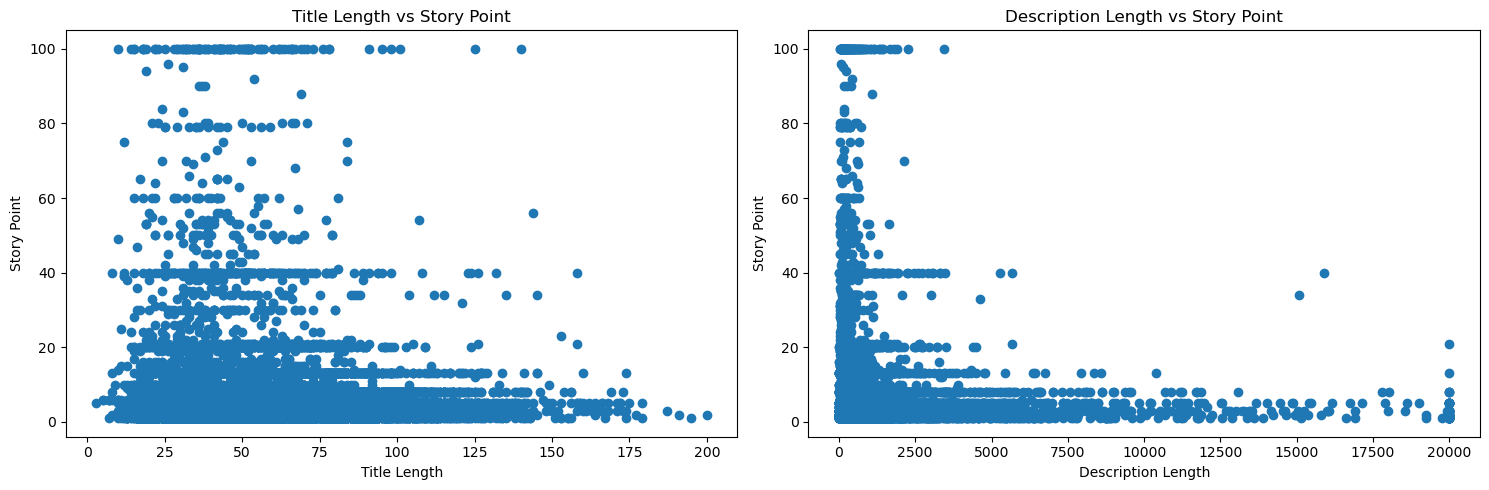

In [6]:
# Find how the title and description length affect the storypoint
df['title_length'] = df['title'].apply(len)
df['description_length'] = df['description'].apply(len)

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].scatter(df['title_length'], df['storypoint'])
ax[0].set_title('Title Length vs Story Point')
ax[0].set_xlabel('Title Length')
ax[0].set_ylabel('Story Point')

ax[1].scatter(df['description_length'], df['storypoint'])
ax[1].set_title('Description Length vs Story Point')
ax[1].set_xlabel('Description Length')
ax[1].set_ylabel('Story Point')

plt.tight_layout()
plt.show()

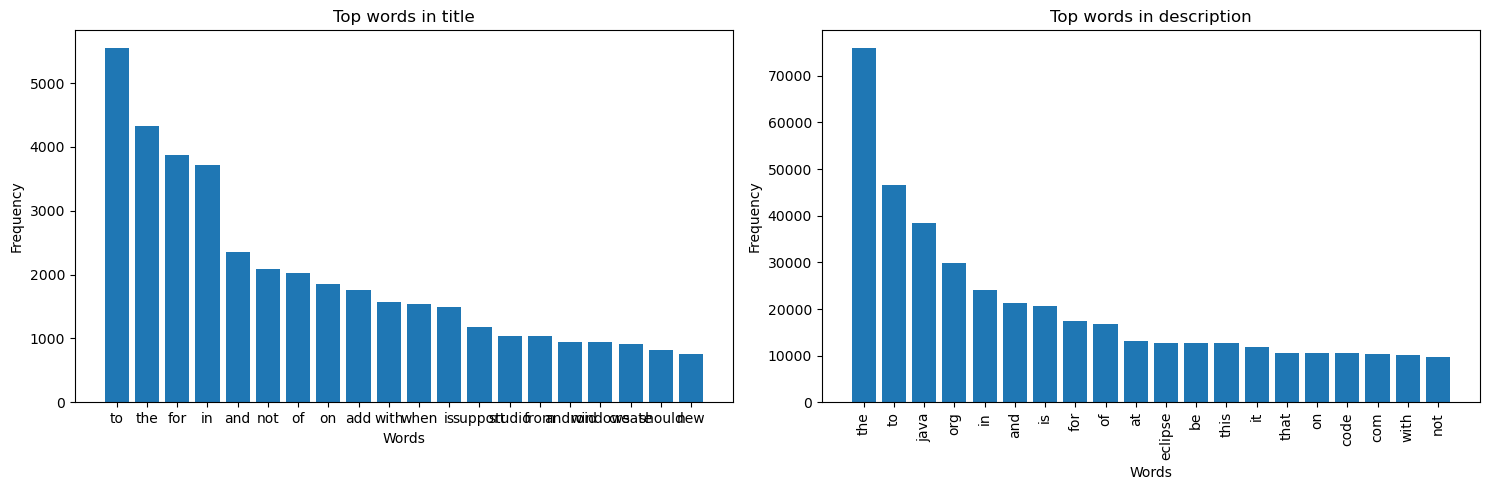

In [7]:
# Import necessary libraries for text analysis
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
from textblob import TextBlob

# Function to get top n words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

# Get top 20 words in title
top_words_title = get_top_n_words(df['title'], 20)
top_df_title = pd.DataFrame(top_words_title, columns=['Word', 'Freq'])

# Get top 20 words in description
top_words_desc = get_top_n_words(df['description'], 20)
top_df_desc = pd.DataFrame(top_words_desc, columns=['Word', 'Freq'])

# Plotting top words
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].bar(top_df_title['Word'], top_df_title['Freq'])
ax[0].set_title('Top words in title')
ax[0].set_xlabel('Words')
ax[0].set_ylabel('Frequency')
plt.xticks(rotation=90)

ax[1].bar(top_df_desc['Word'], top_df_desc['Freq'])
ax[1].set_title('Top words in description')
ax[1].set_xlabel('Words')
ax[1].set_ylabel('Frequency')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

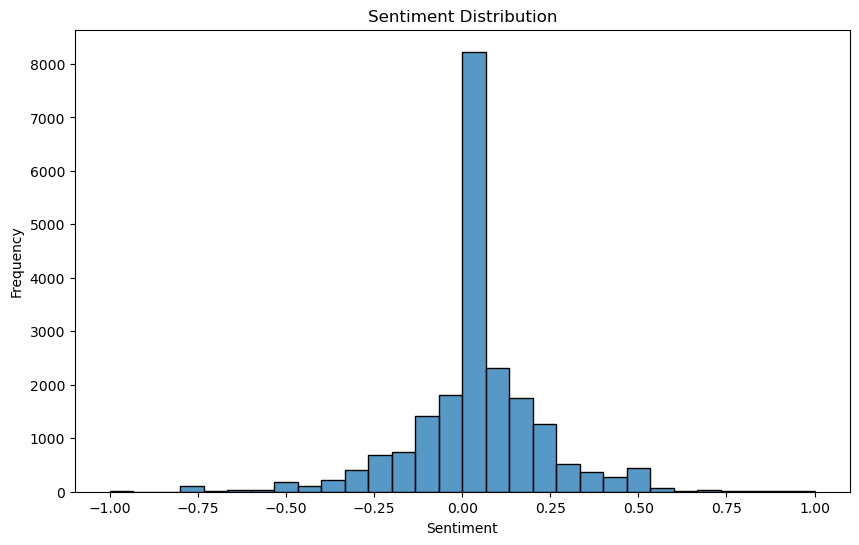

In [8]:
# Perform sentiment analysis on the 'description' column
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

df['sentiment'] = df['description'].apply(get_polarity)

# Plotting sentiment
plt.figure(figsize=(10,6))
sns.histplot(df['sentiment'], kde=False, bins=30)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()

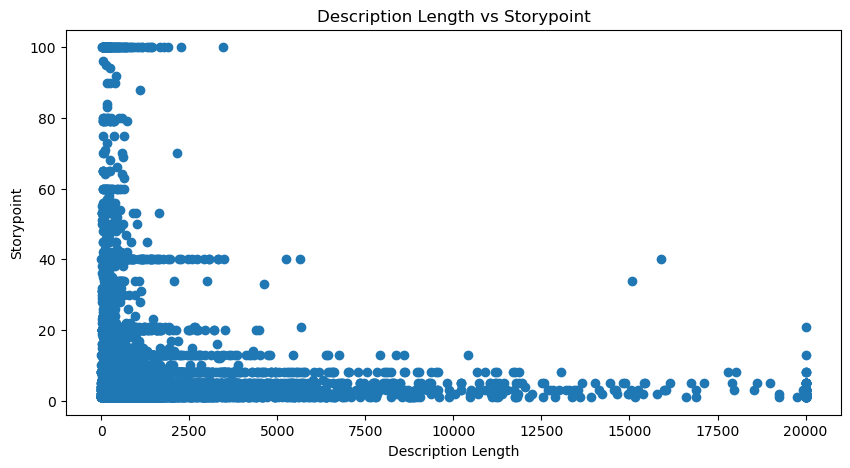

In [9]:
# Create a new column for description length
df['desc_len'] = df['description'].apply(lambda x: len(str(x)))

# Plotting description length vs storypoint
plt.figure(figsize=(10, 5))
plt.scatter(df['desc_len'], df['storypoint'])
plt.title('Description Length vs Storypoint')
plt.xlabel('Description Length')
plt.ylabel('Storypoint')
plt.show()

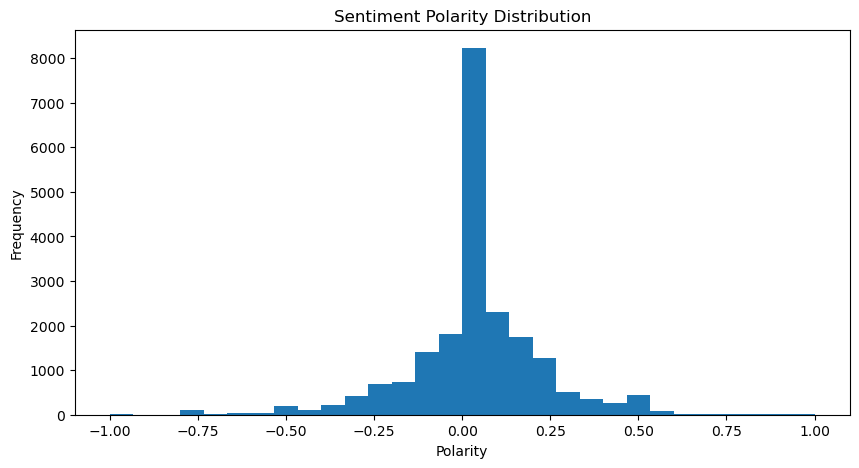

In [10]:
# Function to get the polarity of text
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

# Create a new column for sentiment polarity
df['polarity'] = df['description'].apply(get_polarity)

# Plotting sentiment polarity
plt.figure(figsize=(10, 5))
plt.hist(df['polarity'], bins=30)
plt.title('Sentiment Polarity Distribution')
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.show()

In [11]:
# Download stopwords
nltk.download('stopwords')

NameError: name 'nltk' is not defined

In [ ]:
# Download punkt
nltk.download('punkt')

In [ ]:
# Function to clean text
def clean_text(text):
    # Remove HTML tags
    text = BeautifulSoup(text, 'lxml').get_text()
    # Remove whitespaces
    text = text.strip()
    # Remove {code} tags
    text = re.sub(r'\{code[^\}]*\}[^\{]*\{code\}', '', text)
    # Remove URLs
    text = re.sub(r'http\S+|www\S+', '', text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = nltk.word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    # Remove punctuations
    words = [word for word in words if word.isalpha()]
    # Join words back to text
    text = ' '.join(words)
    return text

# Clean 'description' column
df['description'] = df['description'].apply(clean_text)

# Clean 'title' column
df['title'] = df['title'].apply(clean_text)

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

# Create a new column 'description_length' as the length of 'description' column
df['description_length'] = df['description'].apply(len)

# Create a new column 'title_length' as the length of 'title' column
df['title_length'] = df['title'].apply(len)

# Function to get the polarity of text
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

# Create a new column 'sentiment' as the sentiment of 'description' column
df['sentiment'] = df['description'].apply(get_polarity)

# Plot histogram of 'description_length' column
plt.figure(figsize=(10, 6))
sns.histplot(df['description_length'], bins=50, kde=True, color='blue')
plt.title('Description Length Distribution')
plt.xlabel('Description Length')
plt.ylabel('Frequency')
plt.show()

# Plot histogram of 'title_length' column
plt.figure(figsize=(10, 6))
sns.histplot(df['title_length'], bins=50, kde=True, color='red')
plt.title('Title Length Distribution')
plt.xlabel('Title Length')
plt.ylabel('Frequency')
plt.show()

# Plot histogram of 'sentiment' column
plt.figure(figsize=(10, 6))
sns.histplot(df['sentiment'], bins=50, kde=True, color='green')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()

# Plot correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Import necessary libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Function to display top n keywords for each topic
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print('Topic %d:' % (topic_idx))
        print(' '.join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

# Use TF-IDF Vectorizer to transform the 'description' column
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf = vectorizer.fit_transform(df['description'])

# Use Latent Dirichlet Allocation (LDA) for topic modeling
lda = LatentDirichletAllocation(n_components=10, max_iter=5, learning_method='online', learning_offset=50., random_state=0).fit(tfidf)

# Display top 10 keywords for each topic
display_topics(lda, vectorizer.get_feature_names(), 10)

In [ ]:
# Import necessary libraries
import numpy as np

# Get the topic distribution for each description
topic_distribution = lda.transform(tfidf)

# Get the dominant topic for each description
dominant_topic = np.argmax(topic_distribution, axis=1)

# Add the dominant topic as a new column 'dominant_topic' to the dataframe
df['dominant_topic'] = dominant_topic

# Plot the average storypoint for each dominant topic
plt.figure(figsize=(10, 6))
sns.barplot(x='dominant_topic', y='storypoint', data=df, estimator=np.mean, ci=None, color='blue')
plt.title('Average Storypoint for Each Dominant Topic')
plt.xlabel('Dominant Topic')
plt.ylabel('Average Storypoint')
plt.show()

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.inspection import permutation_importance

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['description'], df['storypoint'], test_size=0.2, random_state=42)

# Use TF-IDF Vectorizer to transform the 'description' column
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Initialize the models
dt = DecisionTreeRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)
gb = GradientBoostingRegressor(random_state=42)

# Train the models
dt.fit(X_train_tfidf, y_train)
rf.fit(X_train_tfidf, y_train)
gb.fit(X_train_tfidf, y_train)

# Make predictions
dt_pred = dt.predict(X_test_tfidf)
rf_pred = rf.predict(X_test_tfidf)
gb_pred = gb.predict(X_test_tfidf)

# Evaluate the models
print('Decision Tree: MSE =', mean_squared_error(y_test, dt_pred), ', R2 =', r2_score(y_test, dt_pred))
print('Random Forest: MSE =', mean_squared_error(y_test, rf_pred), ', R2 =', r2_score(y_test, rf_pred))
print('Gradient Boosting: MSE =', mean_squared_error(y_test, gb_pred), ', R2 =', r2_score(y_test, gb_pred))

# Interpret the models
dt_importance = permutation_importance(dt, X_test_tfidf, y_test, n_repeats=10, random_state=42)
rf_importance = permutation_importance(rf, X_test_tfidf, y_test, n_repeats=10, random_state=42)
gb_importance = permutation_importance(gb, X_test_tfidf, y_test, n_repeats=10, random_state=42)

print('Decision Tree: Feature Importance =', dt_importance.importances_mean)
print('Random Forest: Feature Importance =', rf_importance.importances_mean)
print('Gradient Boosting: Feature Importance =', gb_importance.importances_mean)

In [ ]:
# Import necessary libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

# Use TF-IDF Vectorizer to transform the 'description' column
vectorizer = TfidfVectorizer(max_df=0.5, max_features=10000, min_df=2, stop_words='english', use_idf=True)
X = vectorizer.fit_transform(df['description'])

# Perform dimensionality reduction using LSA
svd = TruncatedSVD(100)
lsa = make_pipeline(svd, Normalizer(copy=False))
X = lsa.fit_transform(X)

# Explained variance
explained_variance = svd.explained_variance_ratio_.sum()
print('Explained variance of the SVD step: {}%'.format(int(explained_variance * 100)))

# Update the 'description' column with the new features
df['description'] = list(X)

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('storypoint', axis=1), df['storypoint'], test_size=0.2, random_state=42)

# Initialize the models
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)

# Train the models
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
gb.fit(X_train, y_train)

# Make predictions
dt_pred = dt.predict(X_test)
rf_pred = rf.predict(X_test)
gb_pred = gb.predict(X_test)

# Evaluate the models
print('Decision Tree:')
print(classification_report(y_test, dt_pred))
print('Random Forest:')
print(classification_report(y_test, rf_pred))
print('Gradient Boosting:')
print(classification_report(y_test, gb_pred))

# Confusion matrices
dt_cm = confusion_matrix(y_test, dt_pred)
rf_cm = confusion_matrix(y_test, rf_pred)
gb_cm = confusion_matrix(y_test, gb_pred)

# Plot confusion matrices
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.heatmap(dt_cm, annot=True, ax=ax[0], cmap='Blues')
ax[0].set_title('Decision Tree')
sns.heatmap(rf_cm, annot=True, ax=ax[1], cmap='Blues')
ax[1].set_title('Random Forest')
sns.heatmap(gb_cm, annot=True, ax=ax[2], cmap='Blues')
ax[2].set_title('Gradient Boosting')
plt.show()

In [ ]:
# Import necessary libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

# Use TF-IDF Vectorizer to transform the 'description' column
vectorizer = TfidfVectorizer(max_df=0.5, max_features=10000, min_df=2, stop_words='english', use_idf=True)
X = vectorizer.fit_transform(df['description'])

# Perform dimensionality reduction using LSA
svd = TruncatedSVD(100)
lsa = make_pipeline(svd, Normalizer(copy=False))
X = lsa.fit_transform(X)

# Explained variance
explained_variance = svd.explained_variance_ratio_.sum()
print('Explained variance of the SVD step: {}%'.format(int(explained_variance * 100)))

# Update the 'description' column with the new features
df['description'] = list(X)

# Check the dataframe
df.head()

In [ ]:
# Convert the numpy arrays in the 'description' column back into strings
df['description'] = df['description'].apply(lambda x: ' '.join(map(str, x)))

# Use TF-IDF Vectorizer to transform the 'description' column
vectorizer = TfidfVectorizer(max_df=0.5, max_features=10000, min_df=2, stop_words='english', use_idf=True)
X = vectorizer.fit_transform(df['description'])

# Perform dimensionality reduction using LSA
svd = TruncatedSVD(100)
lsa = make_pipeline(svd, Normalizer(copy=False))
X = lsa.fit_transform(X)

# Explained variance
explained_variance = svd.explained_variance_ratio_.sum()
print('Explained variance of the SVD step: {}%'.format(int(explained_variance * 100)))

# Update the 'description' column with the new features
df['description'] = list(X)

# Check the dataframe
df.head()